# Assignment 3

## Question 1 (12 points)
Using the customer churn dataset create a **logistic regression** model to predict whether a customer will churn or not.

Follow the steps outlined in the [Classification notebook](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/08-Machine-Learning-Overview/03-Classification.ipynb):
* Preprocessing: deleting columns with no predictive power
* Preprocessing: categorical variables
* Create feature matrix and target vector
* Split the data into train and test with a 70-30 split (use `random_state=775`)
* Instantiate and fit the model
* Make predictions and find the overall accuracy, sensitivity, and specificity on your test set

**Note:** We have seen this dataset before in the [EDA notebook](https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/07-EDA/02-Exploratory-Data-Analysis.ipynb).

## Question 2 (8 points)
Open ended - Do further data exploration and create new variables (feature engineering). Show your discovery process using plots and summaries. How does the model performance change by adding new variables or potentially removing some of the less important ones?

---

### Upload your .ipynb file to Questrom Tools

A potential issue is to download the notebook before it was fully saved. To avoid this, follow these steps: 
1. go to Runtime (in the menu) and hit "Restart and run all..." 
2. after the notebook is fully run save it and then download your .ipynb to your computer 
3. upload it back to your Drive and open it with Colab to ensure all of your recent changes are there 
4. upload the originally downloaded file to Questrom Tools.

---

The data has been loaded in the following cell:

## Question 1



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/Telco-Customer-Churn.csv')
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.732178
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


In [ ]:
churn_df = df.drop('customerID', axis=1)  # dropping customerID as it doesn't have any predictive power

In [ ]:
df_dummified = pd.get_dummies(churn_df, drop_first=True)  # One-hot encoding
df_dummified.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)  # renaming Churn_Yes to Churn
df_dummified.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.850000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.750000,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
X_df = df_dummified.drop('Churn', axis=1)
y_df = df_dummified['Churn']

X_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.3, random_state=775)

In [ ]:
 from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')  

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
sum(ytest == 0)/len(ytest)

0.7468054898248935

In [ ]:
n_test = len(ytest)
n_test

2113

In [ ]:
P = sum(ytest == 1)
P

535

In [ ]:
TP = sum((ytest == 1) & (y_model == 1))
TP

303

In [ ]:
TP/P

0.5663551401869159

In [ ]:
N = sum(ytest == 0)
N

1578

In [ ]:
TN = sum((ytest == 0) & (y_model == 0))
TN

1437

In [ ]:
TN/N

0.9106463878326996

## Question 2

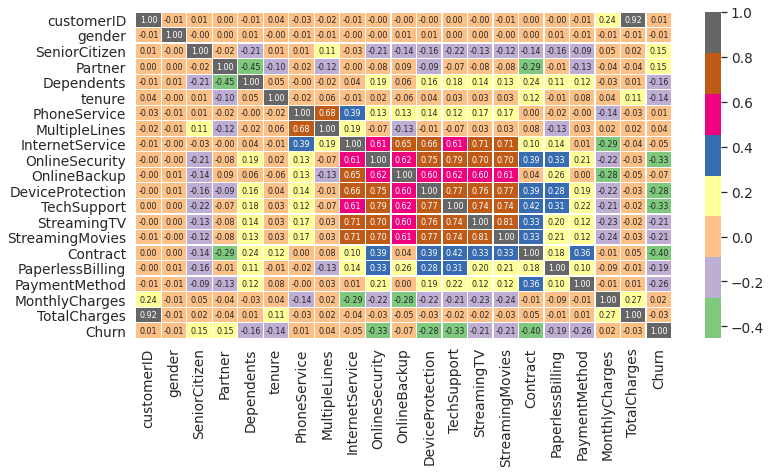

In [ ]:
plt.figure(figsize=(12, 6))
#df.drop(['customerID'], axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Accent", annot =True, annot_kws={'size': 8}, fmt='.2f')
sns.set(font_scale=1.25)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/Telco-Customer-Churn.csv')
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

# Created a heatmap and dropped features with correlation closes to 0
new_df = df.drop(['customerID','TotalCharges','MonthlyCharges','OnlineBackup','InternetService','MultipleLines','PhoneService','gender'], axis=1,)
new_df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,Yes,No,1,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,No,No,34,Yes,Yes,No,No,No,One year,No,Mailed check,No
2,0,No,No,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,No,No,45,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,No,No,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,0,Yes,Yes,72,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,0,Yes,Yes,11,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,1,Yes,No,4,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
new_df_dummified = pd.get_dummies(new_df, drop_first=True)  # One-hot encoding
new_df_dummified.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)  # renaming Churn_Yes to Churn
new_df_dummified.head()

,SeniorCitizen,tenure,Partner_Yes,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
new_X_df = new_df_dummified.drop('Churn', axis=1)
new_y_df = new_df_dummified['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

new_Xtrain, new_Xtest, new_ytrain, new_ytest = train_test_split(new_X_df, new_y_df, test_size=0.3, random_state=775)

In [ ]:
 from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')  

In [ ]:
model.fit(new_Xtrain, new_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
new_y_model = model.predict(new_Xtest)

In [ ]:
sum(new_ytest == 0)/len(new_ytest)

0.7468054898248935

In [ ]:
new_n_test = len(new_ytest)
new_n_test

2113

In [ ]:
new_P = sum(new_ytest == 1)
new_P

535

In [ ]:
new_TP = sum((new_ytest == 1) & (new_y_model == 1))
new_TP

286

In [ ]:
new_TP/new_P

0.5345794392523364

In [ ]:
new_N = sum(new_ytest == 0)
new_N

1578

In [ ]:
new_TN = sum((new_ytest == 0) & (new_y_model == 0))
new_TN

1419

In [ ]:
new_TN/new_N

0.8992395437262357

## Results
After dropping features with low correlationn to Chrun, my model performed worse in terms of True Positives Rate (TPR) and and True Negative Rate (TNR).

Orig TPR: 0.5663

New TPR: 0.5345

Orig TNR: 0.9016

New TNR: 0.8992

